<h1 style="font-size:30px;text-align: center;">- Introduction to Data Science  - Student Project -</h1>
<h1 style="font-size:25px;text-align: center;">- Bike Sharing - Success classification -</h1>

![Algebra](https://repozitorij.algebra.hr/sites/repozitorij.algebra.hr/files/algebra_subbrand_vu_color-black_h_1.png)

=========================================================================================================================
<b>*Made: January 2021.* </b>

<b>*Author: Mislav Spajić, univ. bacc. ing. agr.*</b>

<b>*Menthors: doc. dr. sc. Goran Klepac, mr. sc. Mirko Talajić*</b>

## Table of Contents

[1. Introduction](#introduction)
   > [1.1. Goal of the project](#goal)   
   > [1.2. Dataset description](#dataset)    
   > [1.3. Problem description](#problem)
   

[2. Prerequisites](#prereq)


[3. Data quality analysis](#dqual)
    
   > [3.1. Importing data](#data)  
   > [3.2. Missing values](#miss)   
   > [3.3. Deriving the target variable](#derive)    
   > [3.4. Dropping unneeded columns](#drop)  
   > [3.5. Distribution of categorical variables](#distcat)  
   > [3.6. Distribution of continuous variables](#distcont)

[4. Univariate analysis](#ua)

   > [4.1. WoE, IV for each variable](#woeiv)  
   > [4.2. Selection of most predictive variables](#select)    
   > [4.3. Coarse Classing - grouping by WoE](#cc)
   
[5. Preparation for predictive model](#prep)

   > [5.1. Correlation calculation](#corr)    
   > [5.2. Variable reduction](#reduc)    
   > [5.3. Dummy variable creation](#dummy)  
   > [5.4. Dummies correlation](#dcorr)
  
[6. Model development](#model)

   > [6.1. Train - test split](#ttsplit)   
   > [6.2. Helper functions](#helper)    
   > [6.3. Logistic Regression](#logreg)    
   > [6.4. Challenge model](#chall)   
   > [6.5. Random Forest](#rf)   
   > [6.6. Hyperparameter optimization](#hyper)   
   > [6.7. Herfindahl-Hirschman Index](#hhi)  
   > [6.8. Stability index ](#stab) 
   
[7. Project conclusion](#conclusion) 

---------------------------------------------------------------------
   

## 1. Introduction<a name="introduction"></a>

### 1.1. Goal of the project<a name="goal"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Goal of this student project was to successfully apply knowledge learnt in the class 'Introduction to Data Science' on a given dataset. Primarily, application of attribute relevance analysis techniques we have learnt (Weight of Evidence and Information Value), prediction of success/non-success of the target variable using logistic regression model and other classification algorithms, evaluation of the models using AUC-ROC curve, classification matrix, etc. I have been assigned with a dataset regarding one bike sharing service usage. More details about the dataset in the next chapter.

### 1.2. Dataset description<a name="dataset"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will be using Bike sharing dataset provided by UCI Machine Learning Repository. 

&nbsp;&nbsp;&nbsp;&nbsp;Data was obtained from this link : https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#.

&nbsp;&nbsp;&nbsp;&nbsp;This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 

&nbsp;&nbsp;&nbsp;Attribute Information:

&nbsp;&nbsp;&nbsp;Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv.

- **instant**: record index
- **dteday** : date
- **season** : season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not (extracted from [Web Link])
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit** :
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered





### 1.3. Problem description<a name="problem"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.

&nbsp;&nbsp;&nbsp;&nbsp;Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviours. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. Authors of this dataset aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information was extracted from http://www.freemeteo.com.

&nbsp;&nbsp;&nbsp;&nbsp;Since the goal of this project is to create a binary classification  model and the logical target variables in this dataset (casual, registered, cnt) are discrete numerical variables, I will derive the binary target variable from count of the total rental bikes (cnt). Was some day success (1) or non-success (0) will be determined by comparing the value for that day with monthly mean in which that day falls in. 

&nbsp;&nbsp;&nbsp;&nbsp;I will use the daily data to try to successfully predict was some day success (1) or non-success (0).

# 2. Prerequisites<a name="prereq"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Importing needed Python libraries & modules and initial setup.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

%matplotlib inline 
#Jupyter inline magic command needed to display plots
plt.style.use("ggplot")
#Setting different plot style than default, using ggplot style derived from famous R library ggplot2
seed=42
#Defining seed variable to use in algorithms which rely on randomness, this is for reproducibility

# 3. Data quality analysis<a name="dqual"></a>

## 3.1. Importing data<a name="data"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will use the daily data to conduct the analysis and modelling.

In [131]:
#Importing the data and checking how does it look
data=pd.read_csv("https://github.com/MySlav/BikeSharingProject/raw/main/data/day.csv")
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
#Checking data types
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [133]:
#Renaming columns for readability
data.rename(columns={'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'yr':'year'},inplace=True)

## 3.2. Missing values<a name="miss"></a>

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   dteday             731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   is_holiday         731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   is_workingday      731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  total_count        731 non-null    int64  
dtypes: float64(4), int64(11), 

&nbsp;&nbsp;&nbsp;&nbsp;We can see I have imported 16 columns and 731 rows of data, none of the columns contains missing values.

In [135]:
#We can also check the missing values this way
data.isnull().sum()

instant              0
dteday               0
season               0
year                 0
month                0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

## 3.3. Deriving the target variable<a name="derive"></a>

&nbsp;&nbsp;&nbsp;&nbsp;As mentioned before, because of the nature of this project, we need a binary target variable. I will derive the binary target variable from count of the total rental bikes (total_count). Was some day success (1) or non-success (0) will be determined by comparing the value for that day with monthly mean in which that day falls in (rounded to whole number). 

success = total_count  $\ge$ mean (total_count  for that month in particular year)

In [136]:
#Calculating the needed monthly means(for each year)
mmean=data.groupby(['year','month']).mean()['total_count'].round()
#Converting it to dictionary object
mmean=mmean.to_dict()
mmean

{(0, 1): 1232.0,
 (0, 2): 1722.0,
 (0, 3): 2066.0,
 (0, 4): 3162.0,
 (0, 5): 4381.0,
 (0, 6): 4784.0,
 (0, 7): 4559.0,
 (0, 8): 4409.0,
 (0, 9): 4247.0,
 (0, 10): 3984.0,
 (0, 11): 3406.0,
 (0, 12): 2817.0,
 (1, 1): 3121.0,
 (1, 2): 3556.0,
 (1, 3): 5319.0,
 (1, 4): 5807.0,
 (1, 5): 6318.0,
 (1, 6): 6761.0,
 (1, 7): 6568.0,
 (1, 8): 6919.0,
 (1, 9): 7286.0,
 (1, 10): 6414.0,
 (1, 11): 5089.0,
 (1, 12): 3991.0}

&nbsp;&nbsp;&nbsp;&nbsp;This looks good, now we can create a new column "success" based on the aforementioned expression.

In [137]:
#Prerequisite
data["yearmonth"] = [*zip(data.year, data.month)]
#Creating the needed series and checking it
success=(data["total_count"]>=data["yearmonth"].map(mmean)).astype(int)
data.drop(columns="yearmonth",inplace=True)
success.value_counts()

1    424
0    307
dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;This is good, distribution of the derived variable is not heavily skewed neither towards success neither to non-success.

In [138]:
#Adding the variable to the dataframe
data["success"]=success

## 3.4. Dropping unneeded columns<a name="drop"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Since I derived the "success" column from the "total_count", I should drop that column. Also, since "total_count" is the sum of "casual" and "registered" riders for that day, these are directly "responsible" for the values of "success" and model for predicting "success" with these predictors wouldn't have sense.

In [139]:
data.drop(columns=["total_count","casual","registered"],inplace=True)
data.head()

,instant,dteday,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,success
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1


&nbsp;&nbsp;&nbsp;&nbsp;Since the initial data contains columns for year and month we can derive the day of the month from "datetime" and drop that column without loosing any information. We can also drop "instant" as this is record index.

In [140]:
dayofmonth=(data["dteday"].str.slice(8,10)).astype(int)
data["dteday"]=dayofmonth
data.rename(columns={"dteday":"dayofmonth"},inplace=True)
data.drop(columns="instant",inplace=True)
data.head()

,dayofmonth,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,success
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1


&nbsp;&nbsp;&nbsp;&nbsp;Looks fine now, we can proceed to further analyze the data.

## 3.5. Distribution of categorical variables<a name="distcat"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will quickly see the distribution of categorical variables using basic descriptive statistics and bar plots.

In [141]:
#List of all categorical columns
cat=["dayofmonth", "season","year","month","is_holiday","weekday","is_workingday","weather_condition","success"]

In [142]:
data[cat].astype("category").describe() 

,dayofmonth,season,year,month,is_holiday,weekday,is_workingday,weather_condition,success
count,731,731,731,731,731,731,731,731,731
unique,31,4,2,12,2,7,2,3,2
top,1,3,1,1,0,0,1,1,1
freq,24,188,366,62,710,105,500,463,424


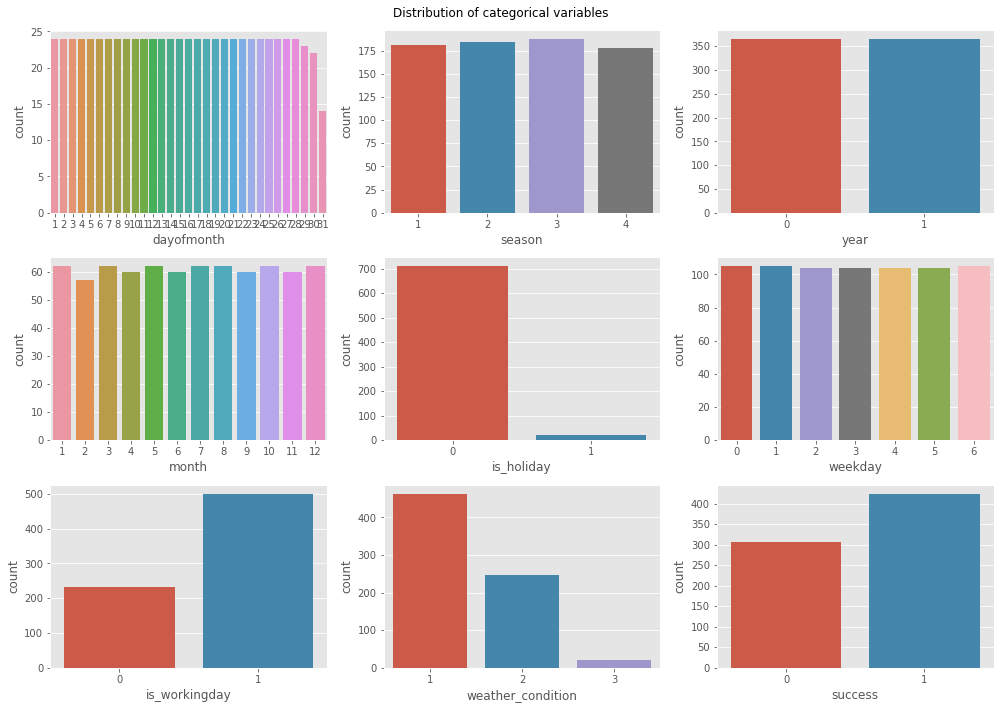

In [143]:
fig, axes =plt.subplots(3,3,figsize=(14,10))
axes = axes.flatten()
fig.suptitle('Distribution of categorical variables')

for ax, catplot in zip(axes, data[cat].columns):
    sns.countplot(x=catplot, data=data[cat], ax=ax)

plt.tight_layout()  
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;This all looks pretty logical and reasonable, most of the data is evenly distributed. 

- "dayofmonth" - it is logical that there are fewer total days like 31. in 2 whole years

- "is_holiday" - it is heavily skewed toward non-holiday since there are many more days which are non-holiday than holiday

- "is_workingday" - same logic as above, there are more working days than non-working, so it is ok

- "weather_condition" - there are many more days with fine weather than with bad, logical for Washington DC weather data

## 3.6. Distribution of continuous variables<a name="distcont"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will check the distribution of continuous variables using basic descriptive statistics, boxplots and histograms.

In [144]:
data.drop(columns=cat).describe()

,temp,atemp,humidity,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


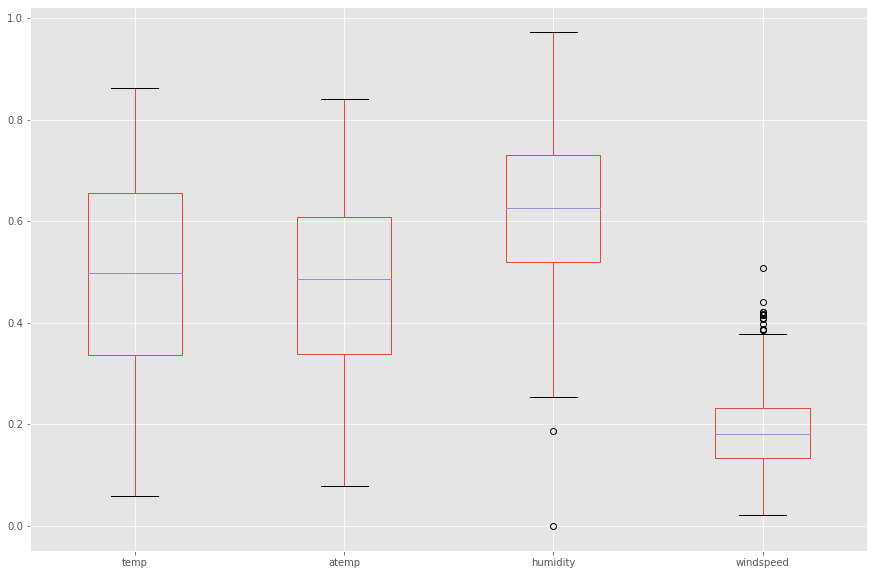

In [145]:
data.drop(columns=cat).boxplot(figsize=(15,10))
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;We can see there are some outliers in "humidity" and "windspeed" variables. I will deal with them later on.

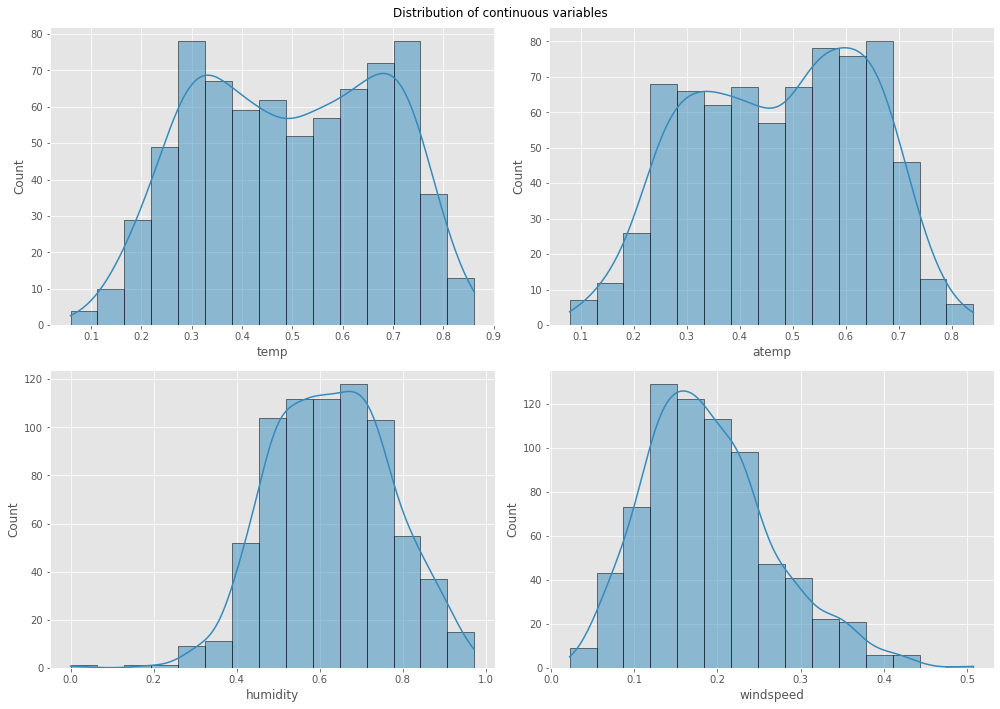

In [146]:
fig, axes =plt.subplots(2,2,figsize=(14,10))
axes = axes.flatten()
fig.suptitle('Distribution of continuous variables')

for ax, col in zip(axes, data.drop(columns=cat).columns):
    sns.histplot(x=col, data=data.drop(columns=cat), ax=ax, kde=True, ec="black", bins=15)

plt.tight_layout()  
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;Humidity and windspeed distributions look pretty good, except the aforementioned outliers, so they are skewed a bit. They are distributed in a bell-like shaped curve which indicates approximately normal distribution. It is interesting that temperature and "feels like" temperature (temp and atemp) aren't approximately normally distributed, and they show some kind of bimodal distribution. I suspect that is because of the seasonal character of temperature. Let's check that out.

In [147]:
data["season"].unique()

array([1, 2, 3, 4], dtype=int64)

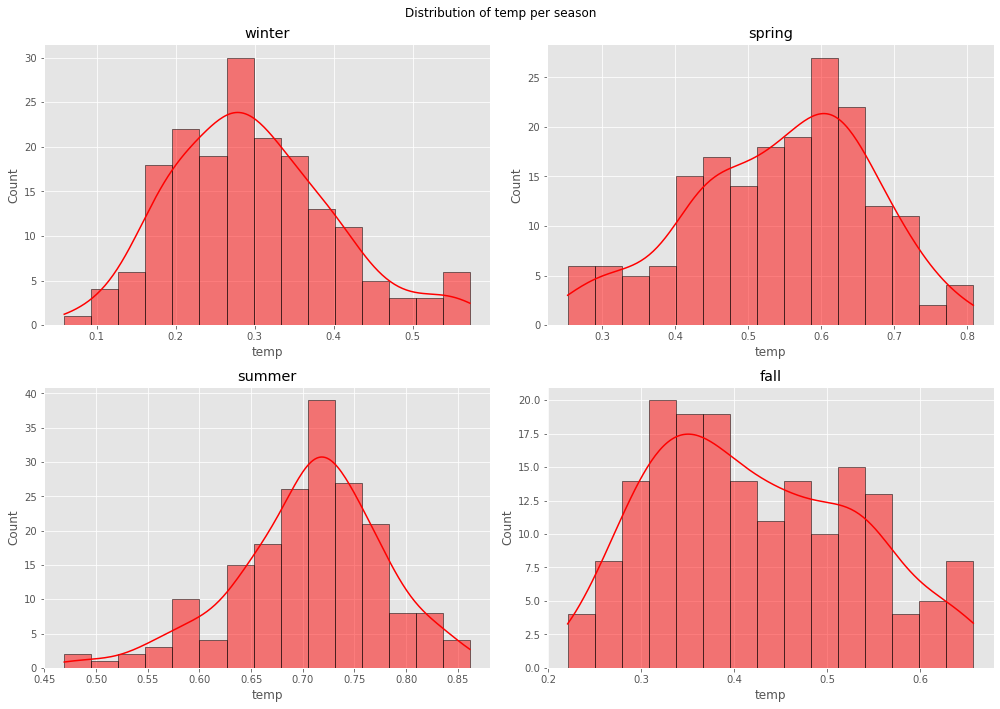

In [148]:
season_dict = {1:"winter", 2:"spring", 3:"summer", 4:"fall"}
fig, axes =plt.subplots(2,2,figsize=(14,10))
axes = axes.flatten()
fig.suptitle('Distribution of temp per season')

for ax, i in zip(axes, data["season"].unique()):
    sns.histplot(data=data.drop(columns=cat)["temp"][data["season"]==i], ax=ax, kde=True,color="red",
                 ec="black",bins=15).set_title(season_dict[i])

plt.tight_layout()  
plt.show()

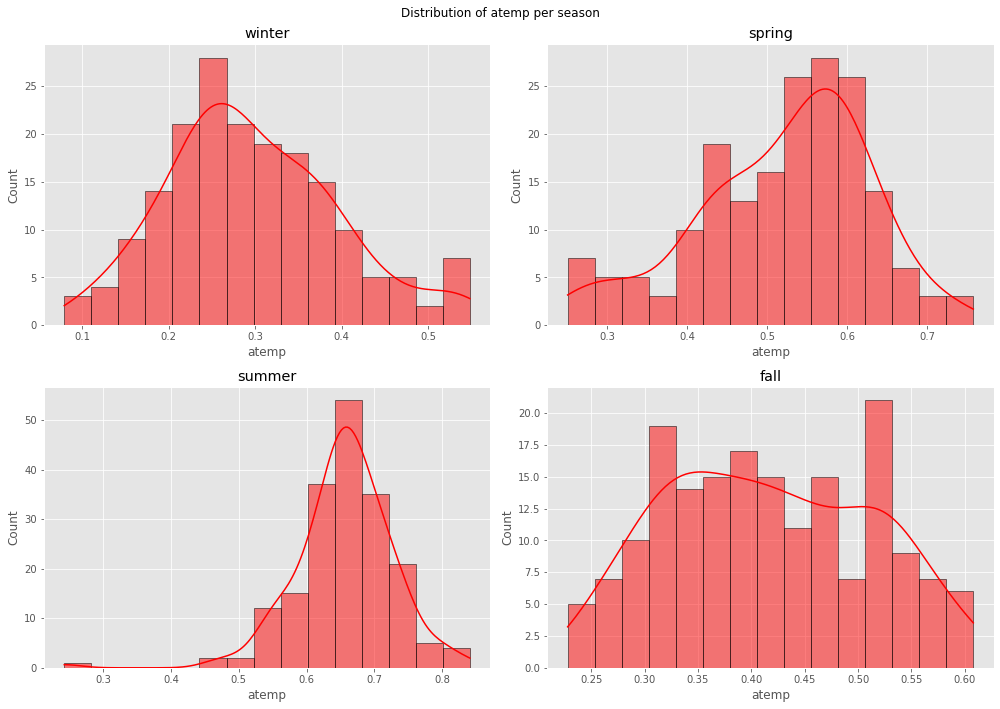

In [149]:
fig, axes =plt.subplots(2,2,figsize=(14,10))
axes = axes.flatten()
fig.suptitle('Distribution of atemp per season')

for ax, i in zip(axes, data["season"].unique()):
    sns.histplot(data=data.drop(columns=cat)["atemp"][data["season"]==i], ax=ax, kde=True,
                 color="red",ec="black",bins=15).set_title(season_dict[i])

plt.tight_layout()  
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;I was right somewhat, these graphs look much better, for all seasons except fall values are unimodally normal-like distributed. The distribution of values in fall is some kind of logical because of the nature of that season.

## 3.7. Outlier detection and treatment <a name="outlier"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will check for outliers in continuous variables using IQR method, all values out of (-1.5IQR ,1.5IQR) range are considered outliers.

In [150]:
#Detecting outliers and columns which contain them
data2=data.copy()
list=[]
for col in data2.drop(columns=cat).columns:
    Q1 = data2[col].quantile(0.25)
    Q3 = data2[col].quantile(0.75)
    IQR = Q3 - Q1
    if ((data2[col] < (Q1 - 1.5 * IQR)) |(data2[col] > (Q3 + 1.5 * IQR))).any():
        list.append(col)
    data2 = data2[~((data2[col] < (Q1 - 1.5 * IQR)) |(data2[col] > (Q3 + 1.5 * IQR)))]
    
#Percentage of outliers - difference between rows size of original and cleared df   
print("Percentage of the rows containing outliers is :",round((1-(data2.shape[0]/data.shape[0]))*100,2,),"%")
print("Columns containing outliers are :",list)

Percentage of the rows containing outliers is : 1.92 %
Columns containing outliers are : ['humidity', 'windspeed']


&nbsp;&nbsp;&nbsp;&nbsp;Since there are only 1.92 % of rows containing outliers I will use a custom function to cap these outliers to the closest existing value within threshold (IQR).

In [151]:
#Function for capping outliers found on stackoverflow.com, modified a bit for my own use
def cap_outliers(series, iqr_threshold=1.5):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = series.loc[~outliers].min()
    series.loc[series > ubound] = series.loc[~outliers].max()

    return series

In [152]:
data["humidity"]=cap_outliers(data["humidity"])
data["windspeed"]=cap_outliers(data["windspeed"])

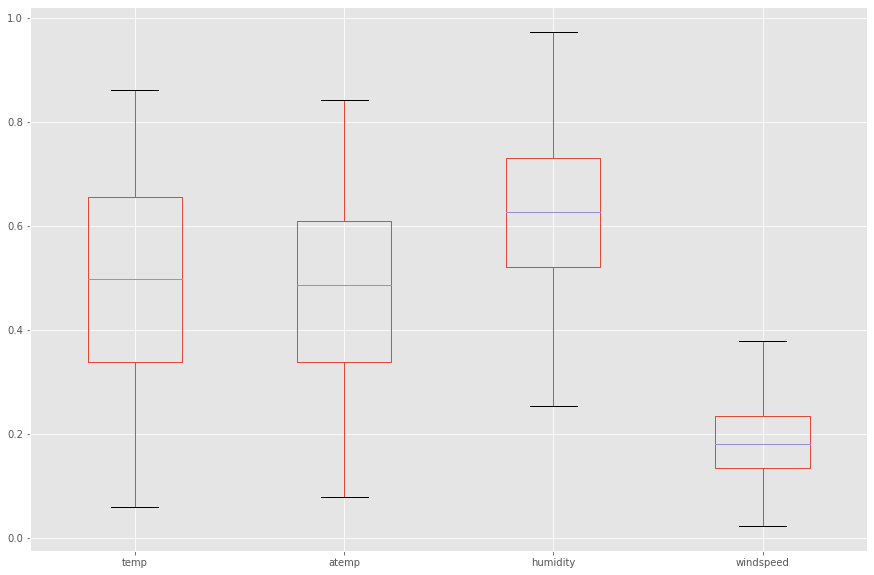

In [153]:
data.drop(columns=cat).boxplot(figsize=(15,10))
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** This looks much better now; I can proceed to univariate analysis. Initial data was pretty "clean", there weren't any missing values, outliers were present in just 2 columns and affected less than 2% of rows. Only problem I had with this dataset was that I had to derive the target variable since this projects goal is to develop binary classification model.

# 4. Univariate analysis<a name="ua"></a>

## 4.1. WoE, IV for each variable<a name="woeiv"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will use the Weight of Evidence and Information Value measures to select the attributes to use as predictors.


**Weight of Evidence**

$$ \Large WoE = [ln(\frac{\text{Relative frequency of Goods}}{\text{Relative frequency of Bads}})] * 100 $$


**Information Value**

$$ \large IV = \sum(DistributionGood_{i} - DistributionBad_{i}) * WoE_{i} $$


**Prerequisites for WoE i IV:**
1. The sample should not contain any missing values.

2. The sample should not contain any continuous attributes. Continuous attributes should be binned into 5–10 bins, upon your liking. Just make sure that each bin has at least 5% of the observations.


&nbsp;&nbsp;&nbsp;&nbsp;Since the data doesn't contain any missing values, I will proceed with binning ("fine classing") of the continuous variables.

In [154]:
data.drop(columns=cat).columns

Index(['temp', 'atemp', 'humidity', 'windspeed'], dtype='object')

In [155]:
#Creating binned variables and dropping original ones
data_binned=data.copy()
for col in data.drop(columns=cat).columns:
    data_binned[col+'_Bins'] = pd.qcut(data_binned[col], 10) # I will cut the continuous attributes into 10 bins

data_binned.drop(data.drop(columns=cat).columns, axis=1, inplace=True)
data_binned.head()

,dayofmonth,season,year,month,is_holiday,weekday,is_workingday,weather_condition,success,temp_Bins,atemp_Bins,humidity_Bins,windspeed_Bins
0,1,1,0,1,0,6,0,2,0,"(0.316, 0.365]","(0.311, 0.364]","(0.753, 0.818]","(0.143, 0.164]"
1,2,1,0,1,0,0,0,2,0,"(0.316, 0.365]","(0.311, 0.364]","(0.669, 0.708]","(0.248, 0.296]"
2,3,1,0,1,0,1,1,1,1,"(0.0581, 0.26]","(0.0781, 0.255]","(0.253, 0.45]","(0.223, 0.248]"
3,4,1,0,1,0,2,1,1,1,"(0.0581, 0.26]","(0.0781, 0.255]","(0.585, 0.627]","(0.143, 0.164]"
4,5,1,0,1,0,3,1,1,1,"(0.0581, 0.26]","(0.0781, 0.255]","(0.253, 0.45]","(0.181, 0.2]"


In [156]:
#Checking percentage of the observations in each bin - should be ok since I used qcut, but just to be sure
for col in data.drop(columns=cat).columns:
    print(data_binned[col+"_Bins"].value_counts(normalize=True))

(0.562, 0.632]    0.102599
(0.0581, 0.26]    0.101231
(0.686, 0.732]    0.101231
(0.26, 0.316]     0.099863
(0.316, 0.365]    0.099863
(0.365, 0.428]    0.099863
(0.428, 0.498]    0.099863
(0.498, 0.562]    0.099863
(0.732, 0.862]    0.098495
(0.632, 0.686]    0.097127
Name: temp_Bins, dtype: float64
(0.0781, 0.255]    0.101231
(0.364, 0.425]     0.101231
(0.255, 0.311]     0.099863
(0.311, 0.364]     0.099863
(0.487, 0.539]     0.099863
(0.539, 0.588]     0.099863
(0.588, 0.638]     0.099863
(0.638, 0.678]     0.099863
(0.678, 0.841]     0.099863
(0.425, 0.487]     0.098495
Name: atemp_Bins, dtype: float64
(0.253, 0.45]     0.101231
(0.708, 0.753]    0.101231
(0.45, 0.5]       0.099863
(0.5, 0.542]      0.099863
(0.542, 0.585]    0.099863
(0.585, 0.627]    0.099863
(0.627, 0.669]    0.099863
(0.669, 0.708]    0.099863
(0.818, 0.972]    0.099863
(0.753, 0.818]    0.098495
Name: humidity_Bins, dtype: float64
(0.0214, 0.1]     0.101231
(0.164, 0.181]    0.101231
(0.1, 0.125]      0.09986

&nbsp;&nbsp;&nbsp;&nbsp;Each bin has at least 5% of the observations. Since now I have fulfilled all the prerequisites, I can proceed to calculation of WoE and IV.

&nbsp;&nbsp;&nbsp;&nbsp;As the target variable, I will use earlier derived success variable.

Defining "Good" - "success" and "Bad" - "non-success" in that variable:
- "Good" - "success" (1) - total count of riders for that day was higher than mean for that month
- "Bad" - "non-success" (0) - total count of riders for that day was not higher than mean for that month

&nbsp;&nbsp;&nbsp;&nbsp;I need to define a custom function which will calculate WoE and IV. The function will calculate Information Value of selected attribute by some target variable (in my case "success"). Then it will return:
- DataFrame object (gives more detailed insight into predictive power)
- Sum of IV value for that attribute

In [157]:
#Function for WoE and IV calculation,found on the internet, I modded it a fair bit, credit to the original author: Dario Radečić
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = dataset[feature].unique().tolist()[i]
        good = dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        bad = dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        if (good==0) | (bad==0): 
            good+=0.5
            bad+=0.5
        #If particular bin contains no event or no non-event, we add 0.5, to make WoE calculable
        #AdjustedWOE = ln (((Number of NE in a group + 0.5) / Number of NE)) / ((Number of E in a group + 0.5) / Number of E))
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': good,
            'Bad': bad
        })
        
    dset = pd.DataFrame(lst)

    
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='Value')
    
    return dset, iv

In [158]:
for col in data_binned.columns[data_binned.columns!="success"]:# skip success as that is target variable column
        print('WoE and IV for column:',col)
        df, iv = calculate_woe_iv(data_binned, col, 'success')
        print(df.to_string(index=False))
        print('\t\t\t\t\t\t\tIV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: dayofmonth
 Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       IV
     1   24    10   14    0.023585   0.045603 -0.659358 0.014518
     2   24    14   10    0.033019   0.032573  0.013587 0.000006
     3   24    17    7    0.040094   0.022801  0.564417 0.009760
     4   24    14   10    0.033019   0.032573  0.013587 0.000006
     5   24    16    8    0.037736   0.026059  0.370261 0.004324
     6   24    14   10    0.033019   0.032573  0.013587 0.000006
     7   24    13   11    0.030660   0.035831 -0.155832 0.000806
     8   24    10   14    0.023585   0.045603 -0.659358 0.014518
     9   24    11   13    0.025943   0.042345 -0.489940 0.008036
    10   24    15    9    0.035377   0.029316  0.187940 0.001139
    11   24    13   11    0.030660   0.035831 -0.155832 0.000806
    12   24    13   11    0.030660   0.035831 -0.155832 0.000806
    13   24    14   10    0.033019   0.032573  0.013587 0.000006
    14   24    17    7    0.040094   0.022801  0.564417 

## 4.2. Selection of most predictive variables<a name="select"></a>

<p style="text-align:center;">IV score interpretation:</p>

| Information Value | Predictive Power |
| --- | --- |
| < 0.02 | Useless for Prediction |
| 0.02 - 0.1 | Weak Predictor |
| 0.1 - 0.3 | Medium Predictor |
| 0.3 - 0.5 | Strong Predictor |
| > 0.5 | Suspicious or too good to be true |


By evaluating results with this table we can conclude:
+ Weak Predictors: 
    - "year" (IV: 0.02)
    - "month" (IV: 0.05)
    - "is_workingday" (IV: 0.05)
    - "is_holiday" (IV: 0.06)
    
    
+ Medium Predictors: 
    - "weekday" (IV: 0.11)
    - "dayofmonth" (IV: 0.12)
    - "season" (IV: 0.12)
    - "windspeed_Bins" (IV: 0.13)
   

+ Strong Predictors:
    - "temp_Bins" (IV: 0.35)
    - "atemp_Bins" (IV: 0.37)
    - "humidity_Bins" (IV: 0.39)
    
    
+ Suspicious or too good to be true:   
     - "weather_condition" (IV: 0.62)


&nbsp;&nbsp;&nbsp;&nbsp; **The conclusion:** Success of a particular day in bike sharing business is strongly influenced by environmental factors.

&nbsp;&nbsp;&nbsp;&nbsp;For development of my models, I will primarily try to use strong predictors ("temp_Bins", "atemp_Bins","humidity_Bins") and 2 of the strongest medium ones ( "windspeed_Bins", "season"). If I see that some of them are heavily correlated, I will omit some.

## 4.3. Coarse Classing - grouping by WoE<a name="cc"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;I will calculate WoE and IV for most relevant attributes again and then see which nearby categories could be grouped. Then I will group them if needed.

Rules related to combining WoE bins

   - Each bin should have at least 5% of the observations
   - The WOE should be distinct for each category. Similar groups should be aggregated or binned together. It is because the bins with similar WoE have almost the same proportion of good or bad, implying the same predictive power

&nbsp;&nbsp;&nbsp;&nbsp;For two adjacent categories to be coarsed they will need to be in +- 0.05 range, which is just a personal preference and can be adjusted if needed later on.

&nbsp;&nbsp;&nbsp;&nbsp;Let's see if I need to further coarse our continuous predictors.

In [159]:
for col in data_binned.drop(columns=cat).columns:
    print(col)
    df, iv = calculate_woe_iv(data_binned,col,"success")
    print(df.to_string(index=False))
    print('\t\t\t\t\t\t\tIV score: {:.2f}'.format(iv))
    print('\n')

temp_Bins
         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       IV
(0.0581, 0.26]   74    20   54    0.047170   0.175896 -1.316137 0.169421
 (0.26, 0.316]   73    41   32    0.096698   0.104235 -0.075050 0.000566
(0.316, 0.365]   73    40   33    0.094340   0.107492 -0.130514 0.001717
(0.365, 0.428]   73    40   33    0.094340   0.107492 -0.130514 0.001717
(0.428, 0.498]   73    49   24    0.115566   0.078176  0.390881 0.014615
(0.498, 0.562]   73    55   18    0.129717   0.058632  0.794076 0.056447
(0.562, 0.632]   75    50   25    0.117925   0.081433  0.370261 0.013511
(0.632, 0.686]   71    49   22    0.115566   0.071661  0.477892 0.020982
(0.686, 0.732]   74    51   23    0.120283   0.074919  0.473446 0.021478
(0.732, 0.862]   72    29   43    0.068396   0.140065 -0.716790 0.051372
							IV score: 0.35


atemp_Bins
          Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       IV
(0.0781, 0.255]   74    21   53    0.049528   0.172638 -1.248655 0.153722
 (0.

&nbsp;&nbsp;&nbsp;&nbsp;We should coarse categories (0.632, 0.686] and (0.686, 0.732] in temp_Bins, as they are nearby categories with similar WoE.

In [160]:
#Coarsing these 2 categories into 1
data_binned["temp_Bins"].replace(to_replace=[pd.Interval(0.632, 0.686),pd.Interval(0.686, 0.732)],
                                 value=pd.Interval(0.632, 0.732),inplace=True)

In [161]:
df, iv = calculate_woe_iv(data_binned,"temp_Bins","success")
print(df.to_string(index=False))
print('\t\t\t\t\t\t\tIV score: {:.2f}'.format(iv))
print('\n')

         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       IV
(0.0581, 0.26]   74    20   54    0.047170   0.175896 -1.316137 0.169421
 (0.26, 0.316]   73    41   32    0.096698   0.104235 -0.075050 0.000566
(0.316, 0.365]   73    40   33    0.094340   0.107492 -0.130514 0.001717
(0.365, 0.428]   73    40   33    0.094340   0.107492 -0.130514 0.001717
(0.428, 0.498]   73    49   24    0.115566   0.078176  0.390881 0.014615
(0.498, 0.562]   73    55   18    0.129717   0.058632  0.794076 0.056447
(0.562, 0.632]   75    50   25    0.117925   0.081433  0.370261 0.013511
(0.632, 0.732]  145   100   45    0.235849   0.146580  0.475622 0.042458
(0.732, 0.862]   72    29   43    0.068396   0.140065 -0.716790 0.051372
							IV score: 0.35




&nbsp;&nbsp;&nbsp;&nbsp;We should also coarse categories (0.164, 0.181] and (0.181, 0.2] in windspeed_Bins, as they are nearby categories with similar WoE.

In [162]:
#Coarsing these 2 categories into 1
data_binned["windspeed_Bins"].replace(to_replace=[pd.Interval(0.164, 0.181),pd.Interval(0.181, 0.2)],
                                 value=pd.Interval(0.164, 0.2),inplace=True)

In [163]:
df, iv = calculate_woe_iv(data_binned,"windspeed_Bins","success")
print(df.to_string(index=False))
print('\t\t\t\t\t\t\tIV score: {:.2f}'.format(iv))
print('\n')

         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       IV
 (0.0214, 0.1]   74    56   18    0.132075   0.058632  0.812094 0.059643
  (0.1, 0.125]   73    47   26    0.110849   0.084691  0.269165 0.007041
(0.125, 0.143]   73    40   33    0.094340   0.107492 -0.130514 0.001717
(0.143, 0.164]   73    43   30    0.101415   0.097720  0.037117 0.000137
  (0.164, 0.2]  146    91   55    0.214623   0.179153  0.180641 0.006407
  (0.2, 0.223]   73    36   37    0.084906   0.120521 -0.350285 0.012476
(0.223, 0.248]   73    39   34    0.091981   0.110749 -0.185685 0.003485
(0.248, 0.296]   73    41   32    0.096698   0.104235 -0.075050 0.000566
(0.296, 0.378]   73    31   42    0.073113   0.136808 -0.626568 0.039909
							IV score: 0.13




&nbsp;&nbsp;&nbsp;&nbsp;In all other attributes WoE values in adjacent categories are distinct enough, so nothing has to be further coarsed.

&nbsp;&nbsp;&nbsp;&nbsp;This looks good now, I can proceed to the preparation for predictive model.

# 5. Preparation for predictive model<a name="prep"></a> 

## 5.1. Correlation calculation<a name="corr"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;Let's calculate the correlation between possible predictors, later on, we will reduce the number of predictors based on these values.

In [164]:
corr = data[["temp","atemp","humidity","season","windspeed"]].corr()
corr.style.background_gradient(cmap="coolwarm")

,temp,atemp,humidity,season,windspeed
temp,1.000000,0.991702,0.126534,0.334315,-0.156822
atemp,0.991702,1.000000,0.139798,0.342876,-0.182864
humidity,0.126534,0.139798,1.000000,0.203424,-0.239875
season,0.334315,0.342876,0.203424,1.000000,-0.226338
windspeed,-0.156822,-0.182864,-0.239875,-0.226338,1.000000


## 5.2. Variable reduction<a name="reduc"></a> 

Guideline for interpretating the size of correlation: 

![Correlation](https://miro.medium.com/max/466/1*Qz_gwy4ZaSZuOpl3IyO2HA.png)

&nbsp;&nbsp;&nbsp;&nbsp;Variables should be omitted if they show high collinearity. Since we can see high positive correlation between "temp" and "atemp", which was logical to expect in the first place, I should choose one of them for development of the model. Since "atemp" has higher IV (0.37) than "temp" (0.35), I will use "atemp". Since "season" has low positive correlation with "atemp" I will also omit it.

&nbsp;&nbsp;&nbsp;&nbsp;Finally, chosen predictors are: "atemp", "humidity" and "windspeed"

## 5.3. Dummy variable creation<a name="dummy"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;Creating dummy variables out of chosen predictors (since they are continuous variables, I will use their binned versions).

In [165]:
atemp_dummy = pd.get_dummies(data_binned["atemp_Bins"],prefix="atemp_Bins")
humidity_dummy = pd.get_dummies(data_binned["humidity_Bins"], prefix="humidity_Bins")
windspeed_dummy = pd.get_dummies(data_binned["windspeed_Bins"],prefix="windspeed_Bins")

dummy = pd.concat([atemp_dummy, humidity_dummy, windspeed_dummy, data_binned["success"]], axis=1)
dummy.head()

,"atemp_Bins_(0.0781, 0.255]","atemp_Bins_(0.255, 0.311]","atemp_Bins_(0.311, 0.364]","atemp_Bins_(0.364, 0.425]","atemp_Bins_(0.425, 0.487]","atemp_Bins_(0.487, 0.539]","atemp_Bins_(0.539, 0.588]","atemp_Bins_(0.588, 0.638]","atemp_Bins_(0.638, 0.678]","atemp_Bins_(0.678, 0.841]",...,"windspeed_Bins_(0.0214, 0.1]","windspeed_Bins_(0.1, 0.125]","windspeed_Bins_(0.125, 0.143]","windspeed_Bins_(0.143, 0.164]","windspeed_Bins_(0.164, 0.2]","windspeed_Bins_(0.2, 0.223]","windspeed_Bins_(0.223, 0.248]","windspeed_Bins_(0.248, 0.296]","windspeed_Bins_(0.296, 0.378]",success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


&nbsp;&nbsp;&nbsp;&nbsp;All the predictors are now in binary format, I can proceed.

## 5.4. Dummies correlation<a name="dcorr"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;All dummy columns that have correlation coefficient greater than $ abs(0.3) $ should be removed. More precisely, the dummy variable with lesser Weight of Evidence score should be removed.

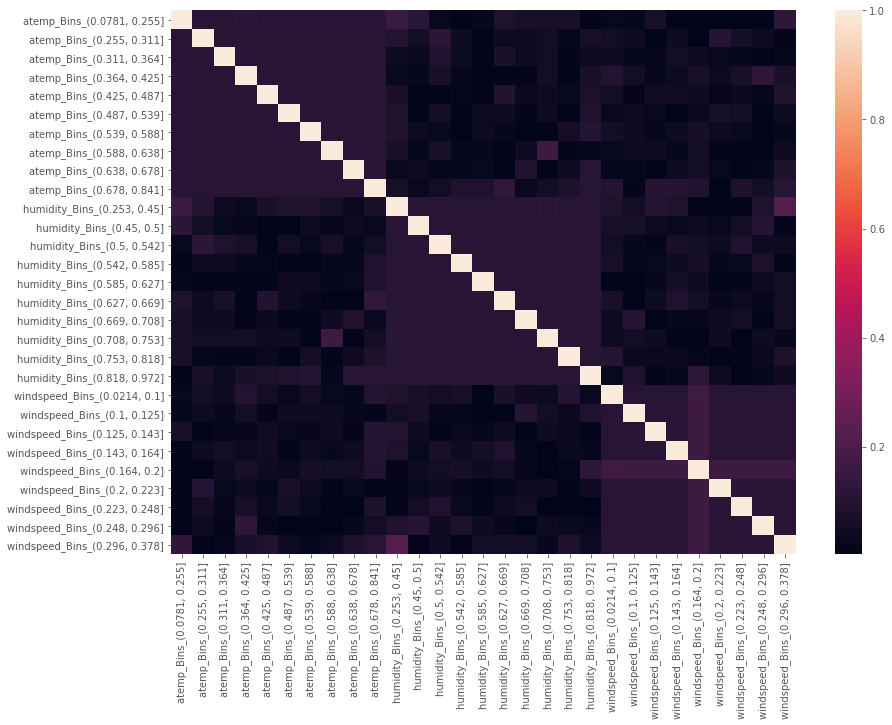

In [166]:
plt.figure(figsize=(14, 10))
corrd=dummy.drop("success",axis=1).corr().abs()
sns.heatmap(corrd)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;This plot is here just to see if there are some highly "problematic" values of correlation, by "eyeballing" this I can conclude that this is fine and created dummy variables aren't correlated beyond 0.3.

&nbsp;&nbsp;&nbsp;&nbsp;To be sure, I will check that with code below.

In [167]:
#Select upper triangle of correlation matrix
upper = corrd.where(np.triu(np.ones(corrd.shape), k=1).astype(np.bool))

#Find dummies with correlation greater than 0.3
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]

#Features to be dropped
to_drop

[]

&nbsp;&nbsp;&nbsp;&nbsp;We can see that it has returned an empty list, so no features are correlated beyond 0.3.

# 6. Model development<a name="model"></a> 

## 6.1. Train - test split<a name="ttsplit"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;As I want to avoid the overfitting of the models to the data, I will split the data in two samples, first which consists of 80% of the data and will be used for development of the models, and second of other 20 % which is for testing purposes.

&nbsp;&nbsp;&nbsp;&nbsp;Models will be tested both on 80% and 20 % samples, but test on the 20 % shows us "real" accuracy of the model.

In [168]:
#Defining target and predictor variables:
X = dummy.drop("success", axis=1)
y = dummy["success"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## 6.2. Helper functions<a name="helper"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will define 3 helper functions to train and evaluate the models. First one will train the model and evaluate on the train sample.

In [169]:
def train_and_validate_on_train(X_train,y_train,mod, target='success'):
 
    # Model fitting on train set and predictions on train set
    model = mod.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    probs = model.predict_proba(X_train)
    
    # Accuracy and precision scores on train set:
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    
    # Classification report and Confusion matrix for train set
    class_report = classification_report(y_train, y_pred)
    conf_matrix = confusion_matrix(y_train, y_pred)
    
    
    # Making of probability dataframe
    prob_lst = []
    for i in range(len(y_train)):
        prob_lst.append({
            'actual': y_train.values[i],
            'predicted': y_pred[i],
            'prob_0': float('{:.2f}'.format(probs[:,0][i])),
            'prob_1': float('{:.2f}'.format(probs[:,1][i])),
        })
    df_prob = pd.DataFrame(prob_lst)

    # Making of Uncertainty dataframe - shows values where predicted probability is between 0.5 and 0.6
    num_uncertain = len(df_prob[(df_prob['prob_0'] < 0.60) & (df_prob['prob_0'] > 0.50)])
    pct_uncertain = ((num_uncertain / len(df_prob)) * 100)
    df_uncertain = pd.DataFrame({'Num. of Uncertain': num_uncertain, '% of Uncertain': pct_uncertain}, index=[0])
    
    # AUC and recall values
    probs = probs[:, 1]
    auc = roc_auc_score(y_train, probs)
    recall = recall_score(y_train, y_pred)
    #ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, probs)

    return class_report, conf_matrix, df_prob, df_uncertain, auc, recall, fpr, tpr,accuracy, precision

&nbsp;&nbsp;&nbsp;&nbsp;Second one will train the model and evaluate on the test sample.

In [170]:
def train_and_validate_on_test(X_train, X_test, y_train, y_test,mod, target='success'):
 
    # Model fitting on train set and predictions on test set
    model = mod.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    # Accuracy and precision scores on test set:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Classification report and Confusion matrix for test set
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Making of probability dataframe
    prob_lst = []
    for i in range(len(y_test)):
        prob_lst.append({
            'actual': y_test.values[i],
            'predicted': y_pred[i],
            'prob_0': float('{:.2f}'.format(probs[:,0][i])),
            'prob_1': float('{:.2f}'.format(probs[:,1][i])),
        })
    df_prob = pd.DataFrame(prob_lst)

    # Making of Uncertainty dataframe - shows values where predicted probability is between 0.5 and 0.6
    num_uncertain = len(df_prob[(df_prob['prob_0'] < 0.60) & (df_prob['prob_0'] > 0.50)])
    pct_uncertain = ((num_uncertain / len(df_prob)) * 100)
    df_uncertain = pd.DataFrame({'Num. of Uncertain': num_uncertain, '% of Uncertain': pct_uncertain}, index=[0])
    
    # AUC and recall values
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    recall = recall_score(y_test, y_pred)
    #ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    
    return class_report, conf_matrix, df_prob, df_uncertain, auc, recall, fpr, tpr,accuracy, precision

&nbsp;&nbsp;&nbsp;&nbsp;Third one will show the results of prior two functions.

In [171]:
def show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision):
    print('Confusion matrix:')
    print(conf_matrix)
    print('\n')
    print('Classification report:')
    print(class_report)
    print('\n')
    print('First 10 probabilities:')
    print(df_prob.head(10))
    print('\n')
    print('Uncertainty:')
    print(df_uncertain)
    print('\n')
    print('AUC: {:.2f}'.format(auc))
    print('Recall: {:.2f}'.format(recall))
    print('Accuracy: {:.2f}'.format(accuracy))
    print('Precision: {:.2f}'.format(precision))
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random chances')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUROC')
    plt.legend()
    plt.show()

## 6.3. Logistic Regression<a name="logreg"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;First classification algorithm I will use is Logistic Regression. I will define it with default parameters.

In [172]:
model_logreg=LogisticRegression() 

&nbsp;&nbsp;&nbsp;&nbsp;Let's check its performance on train set with use of earlier defined helper function.

Confusion matrix:
[[146  97]
 [ 54 287]]


Classification report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       243
           1       0.75      0.84      0.79       341

    accuracy                           0.74       584
   macro avg       0.74      0.72      0.73       584
weighted avg       0.74      0.74      0.74       584



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       0          0    0.58    0.42
1       0          0    0.64    0.36
2       1          1    0.15    0.85
3       1          1    0.18    0.82
4       1          1    0.29    0.71
5       0          0    0.71    0.29
6       1          0    0.59    0.41
7       1          1    0.47    0.53
8       1          1    0.23    0.77
9       1          1    0.30    0.70


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                 57        9.760274


AUC: 0.80
Recall: 0.84
Accuracy: 0.74
Precision: 0.75


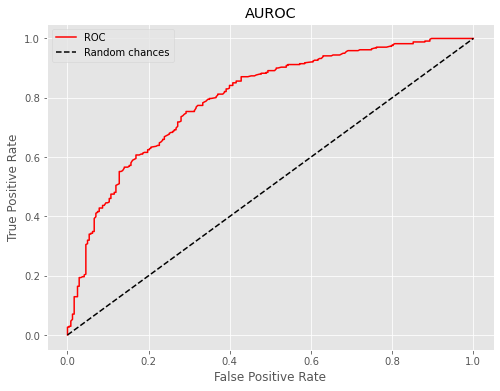

In [173]:
#Results on train set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision=train_and_validate_on_train(X_train
,y_train,model_logreg)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

&nbsp;&nbsp;&nbsp;&nbsp;Model performs solid on the train set, let's check the performance on the test set.

Confusion matrix:
[[35 29]
 [17 66]]


Classification report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        64
           1       0.69      0.80      0.74        83

    accuracy                           0.69       147
   macro avg       0.68      0.67      0.67       147
weighted avg       0.69      0.69      0.68       147



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       1          1    0.35    0.65
1       0          0    0.69    0.31
2       0          1    0.26    0.74
3       1          1    0.36    0.64
4       1          1    0.33    0.67
5       1          1    0.35    0.65
6       0          1    0.47    0.53
7       0          0    0.51    0.49
8       1          1    0.06    0.94
9       0          1    0.46    0.54


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                 16       10.884354


AUC: 0.76
Recall: 0.80
Accuracy: 0.69
Precision: 0.69


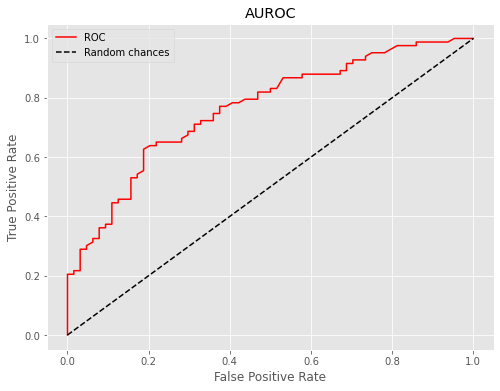

In [174]:
#Results on test set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision=train_and_validate_on_test(X_train,
X_test, y_train, y_test,model_logreg)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** Expectedly it performs worse on the test set, but these are still very solid numbers. Area Under Curve of 0.76, Recall of 0.80, Accuracy of  0.69 and Precision of  0.69 are ok.

## 6.4. Challenge model<a name="chall"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;I will now try to challenge former Logistic Regression model with an introduction of derived behavioural variable. Nature of this data is that it presents a day in bike sharing business and not a customer in credit-risk analysis or churn analysis where this technique is used, so this technique is not fully applicable. We don't have previous observation period and for particular days we can't assess "behaviour" related to previous days.


&nbsp;&nbsp;&nbsp;&nbsp;But let's try to imply a "good day for bike rental business". Let's see if a conclusion that good days are more often the working days with fine weather.

In [175]:
#Creation of "behavioural" variable
good_day_bike=((data["weather_condition"]==1)& (data["is_workingday"]==1)).astype(int).rename("good_day_bike")
#Concatenating with original dummy predictors
dummy2=pd.concat([dummy,good_day_bike],axis=1)

In [176]:
df, iv = calculate_woe_iv(dummy2,"good_day_bike","success")
print(df.to_string(index=False))
print('\t\t\t\t\t\t\tIV score: {:.2f}'.format(iv))
print('\n')

 Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       IV
     0  424   191  233    0.450472   0.758958 -0.521651 0.160922
     1  307   233   74    0.549528   0.241042  0.824088 0.254219
							IV score: 0.42




&nbsp;&nbsp;&nbsp;&nbsp;IV value looks promising. Let's check correlation with previously used predictor variables.

In [177]:
corr = pd.concat([data[["atemp","humidity","windspeed"]],good_day_bike],axis=1).corr()
corr.style.background_gradient(cmap="coolwarm")

,atemp,humidity,windspeed,good_day_bike
atemp,1.000000,0.139798,-0.182864,0.118652
humidity,0.139798,1.000000,-0.239875,-0.366731
windspeed,-0.182864,-0.239875,1.000000,-0.019482
good_day_bike,0.118652,-0.366731,-0.019482,1.000000


&nbsp;&nbsp;&nbsp;&nbsp;There is a low negative correlation with humidity, but since it is not so strong, I think we can proceed. Let's also check if there is correlation with prior created dummy variables.

In [178]:
#Correlation matrix
corrdd=dummy2.drop("success",axis=1).corr().abs()
#Select upper triangle of correlation matrix
upper = corrdd.where(np.triu(np.ones(corrdd.shape), k=1).astype(np.bool))

#Find dummies with correlation greater than 0.3
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]

#Features to be dropped
to_drop

[]

&nbsp;&nbsp;&nbsp;&nbsp;Newly created variable isn't correlated with dummy variables used before. We can use it in model.

In [179]:
#Defining target and predictor variables:
X = dummy2.drop("success", axis=1)
y = dummy2["success"]

#Splitting in the same manner as original set (using same random state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Confusion matrix:
[[161  82]
 [ 57 284]]


Classification report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       243
           1       0.78      0.83      0.80       341

    accuracy                           0.76       584
   macro avg       0.76      0.75      0.75       584
weighted avg       0.76      0.76      0.76       584



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       0          0    0.66    0.34
1       0          0    0.64    0.36
2       1          1    0.26    0.74
3       1          1    0.23    0.77
4       1          1    0.20    0.80
5       0          0    0.72    0.28
6       1          0    0.64    0.36
7       1          0    0.61    0.39
8       1          1    0.31    0.69
9       1          1    0.19    0.81


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                 52         8.90411


AUC: 0.82
Recall: 0.83
Accuracy: 0.76
Precision: 0.78


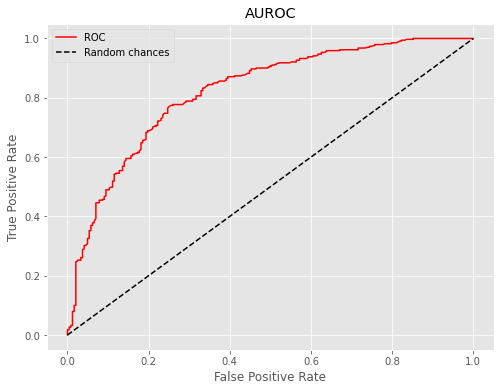

In [180]:
#Results on train set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision=train_and_validate_on_train(X_train
,y_train,model_logreg)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

Confusion matrix:
[[39 25]
 [15 68]]


Classification report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        64
           1       0.73      0.82      0.77        83

    accuracy                           0.73       147
   macro avg       0.73      0.71      0.72       147
weighted avg       0.73      0.73      0.72       147



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       1          1    0.19    0.81
1       0          0    0.57    0.43
2       0          1    0.33    0.67
3       1          1    0.41    0.59
4       1          1    0.18    0.82
5       1          1    0.21    0.79
6       0          0    0.61    0.39
7       0          1    0.27    0.73
8       1          1    0.12    0.88
9       0          1    0.25    0.75


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                 10        6.802721


AUC: 0.80
Recall: 0.82
Accuracy: 0.73
Precision: 0.73


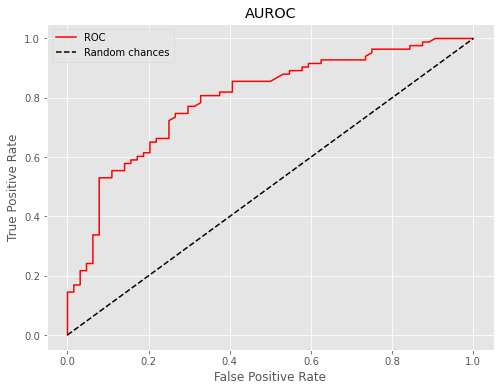

In [181]:
#Results on test set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision = train_and_validate_on_test(X_train,
X_test,y_train, y_test,model_logreg)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** We got better results on both train and test set, and introduction of this derived variable was a good call. From now on, I will use this extra predictor.

## 6.5. Random Forest<a name="rf"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;I will now try to use Random Forest algorithm for this binary classification task. First, I will use it with default parameters as I did with Logistic Regression. I will just use random_state = seed for reproducibility. Hyperparameter optimization will be done in last chapter.

In [182]:
model_rf=RandomForestClassifier(random_state = seed)

Confusion matrix:
[[220  23]
 [ 17 324]]


Classification report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       243
           1       0.93      0.95      0.94       341

    accuracy                           0.93       584
   macro avg       0.93      0.93      0.93       584
weighted avg       0.93      0.93      0.93       584



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       0          0    0.80    0.20
1       0          0    0.84    0.16
2       1          1    0.22    0.78
3       1          1    0.02    0.98
4       1          1    0.00    1.00
5       0          0    0.85    0.15
6       1          1    0.10    0.90
7       1          0    0.73    0.27
8       1          1    0.16    0.84
9       1          1    0.04    0.96


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                 24        4.109589


AUC: 0.99
Recall: 0.95
Accuracy: 0.93
Precision: 0.93


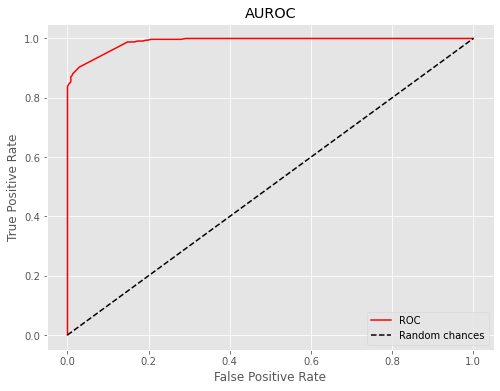

In [183]:
#Results on train set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision = train_and_validate_on_train(X_train,
y_train,model_rf)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

&nbsp;&nbsp;&nbsp;&nbsp;Don't let this info fool you, these aren't great results, as Random Forest algorithm is prone to overfit the train data. Let's see its real value on the test set.

Confusion matrix:
[[39 25]
 [17 66]]


Classification report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65        64
           1       0.73      0.80      0.76        83

    accuracy                           0.71       147
   macro avg       0.71      0.70      0.70       147
weighted avg       0.71      0.71      0.71       147



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       1          1    0.06    0.94
1       0          1    0.24    0.76
2       0          1    0.25    0.75
3       1          1    0.45    0.55
4       1          1    0.10    0.90
5       1          1    0.26    0.74
6       0          0    0.73    0.27
7       0          1    0.33    0.67
8       1          1    0.21    0.79
9       0          1    0.19    0.81


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                  9        6.122449


AUC: 0.73
Recall: 0.80
Accuracy: 0.71
Precision: 0.73


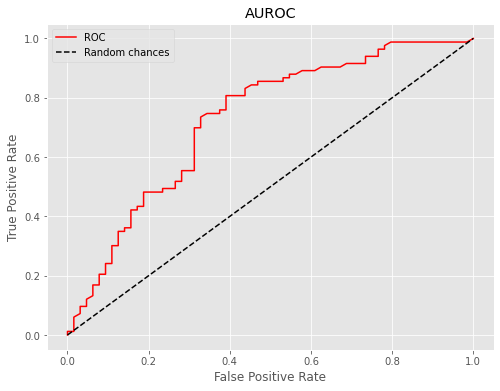

In [184]:
#Results on test set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision = train_and_validate_on_test(X_train,
X_test, y_train, y_test,model_rf)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** Testing on the train data doesn't give us good information about our model's performance, and especially on this algorithm as it is prone to overfit the train data. We can see that Logistic Regression model performs better on the test data than Random Forest model.

## 6.6. Hyperparameter optimization<a name="hyper"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;Let's try to optimize the parameters of both our Random Forest model, to get the best result possible. I will use Grid Search with Cross-Validation to try to find the best parameters. For Logistic Regression model we got very good results, and usually default parameters work best, so I won't try that on that model.

In [185]:
#Defining parameters to be examined
param_grid = {
'n_estimators': [10,100,200,300,400,500],
'max_features': ['auto', 'sqrt','log2'],
'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'criterion': ['gini','entropy']
    }

search = GridSearchCV(model_rf, param_grid, scoring='roc_auc', n_jobs=-1,cv=5, verbose=2)
#n_jobs=-1 - all processors, cv=5 - 5 fold split
search.fit(X_train, y_train)
#WARNING - this is very comp. intensive and could last a while
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.6min


Best parameter (CV score=0.741):
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:  3.5min finished


In [186]:
model_rf2=RandomForestClassifier(random_state=seed, criterion="entropy", max_depth=10, max_features="log2",n_estimators=100)

Confusion matrix:
[[36 28]
 [14 69]]


Classification report:
              precision    recall  f1-score   support

           0       0.72      0.56      0.63        64
           1       0.71      0.83      0.77        83

    accuracy                           0.71       147
   macro avg       0.72      0.70      0.70       147
weighted avg       0.72      0.71      0.71       147



First 10 probabilities:
   actual  predicted  prob_0  prob_1
0       1          1    0.17    0.83
1       0          1    0.31    0.69
2       0          1    0.32    0.68
3       1          1    0.42    0.58
4       1          1    0.18    0.82
5       1          1    0.23    0.77
6       0          0    0.63    0.37
7       0          1    0.35    0.65
8       1          1    0.30    0.70
9       0          1    0.19    0.81


Uncertainty:
   Num. of Uncertain  % of Uncertain
0                 17       11.564626


AUC: 0.77
Recall: 0.83
Accuracy: 0.71
Precision: 0.71


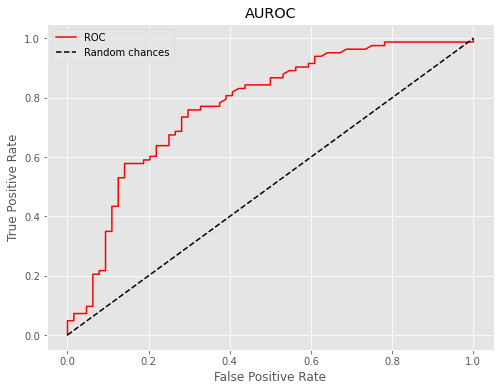

In [187]:
#Results on test set
class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision = train_and_validate_on_test(X_train,
X_test, y_train, y_test,model_rf2)

show(class_report, conf_matrix, df_prob, df_uncertain, auc, recall,fpr,tpr,accuracy,precision)

&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** When I optimized the hyperparameters a bit, now Random Forest model scores a little bit better on the test set, but it is still behind Logistic Regression in terms of AUC, Accuracy and Precision.

## 6.7. Herfindahl-Hirschman Index<a name="hhi"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;Herfindahl–Hirschman Index, or abbreviated HHI, is a commonly accepted measure of market concentration. The HHI is calculated by squaring the market share of each firm competing in the market and then summing the resulting numbers.


$$ \large H = \sum_{i=1}^N𝑆_𝑖^2 $$

<p style="text-align:center;">Si market share of company on market, N number of participants</p>
<p style="text-align:center;">Ranges from 1/N to one</p>



<p style="text-align:center;">Normalized:</p>

$$ \large \overline{H}=(H−1/N)/(1−1/N) $$

<p style="text-align:center;">ranges from 0 to 1</p>

| HHI | Interpretation |
| --- | --- |
| < 0.01 | No concentration |
| 0.01 - 0.15 | Small |
| 0.15 - 0.25 | Medium |
| >0.25 | High |


&nbsp;&nbsp;&nbsp;&nbsp;Since my data doesn't have any data about bike sharing firms or their respective shares in the market. I will try to calculate it this way: I will use the original data and calculate the shares of registered and casual riders over total riders in 2 years.

In [188]:
HHIdata=pd.read_csv("https://github.com/MySlav/BikeSharingProject/raw/main/data/day.csv", usecols=["casual","registered","cnt"])

#Using same seed for split as before
num_train, num_test, cnt_train, cnt_test = train_test_split(HHIdata[["registered","casual"]], HHIdata["cnt"],
                                                            test_size=0.2, random_state=seed)

In [189]:
#Sums - train
casual_sum_train=num_train["casual"].sum()
registered_sum_train=num_train["registered"].sum()
cnt_sum_train=cnt_train.sum()
#Sums - test
casual_sum_test=num_test["casual"].sum()
registered_sum_test=num_test["registered"].sum()
cnt_sum_test=cnt_test.sum()
#Shares - train
casual_share_train=casual_sum_train/cnt_sum_train
registered_share_train=registered_sum_train/cnt_sum_train
#Shares - test
casual_share_test=casual_sum_test/cnt_sum_test
registered_share_test=registered_sum_test/cnt_sum_test
#HHI
HHI_train=casual_share_train**2+ registered_share_train**2
HHI_test=casual_share_test**2+ registered_share_test**2
#HHI-normalized
HHI_train_norm=(HHI_train-1/2)/(1-1/2)
HHI_test_norm=(HHI_test-1/2)/(1-1/2)

In [190]:
print('HHI for train set is - {:.2f}, normalized value - {:.2f}'.format(HHI_train,HHI_train_norm))
print('HHI for test set is - {:.2f}, normalized value - {:.2f}'.format(HHI_test,HHI_test_norm))

HHI for train set is - 0.69, normalized value - 0.38
HHI for test set is - 0.70, normalized value - 0.41


&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** As I have mentioned afore, I didn't have any data about market shares, so I used this workaround to calculate the HHI. This high concentration result was to be expected since in this case I have just 2 competing "firms" (casual and registered riders and their respective shares in total count over 2 years). It is interesting to see that HHI is almost the same for train and test set, which means that total numbers of casual and registered riders are balanced over train and test set.

## 6.8. Stability index<a name="stab"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;Stability index is a measure of how much a population has shifted over time or between two different samples of a population in a single number. It does this by bucketing the two distributions and comparing the percentages of items in each of the buckets, resulting in a single number you can use to understand how different the populations are. In situation where predictive model exists, it could be applied on probability bins, which is based on probability scale. It also could be applied on variables which were recognized as most predictive during attribute relevance analysis process, customer prospective value categories, segments which were recognized by clustering algorithms or similar results which is integral part of the churn
solution. In simple words, Stability index compares the distribution of a scoring variable (predicted probability) in scoring data set to a training data set that was used to develop the model. The idea is to check "How the current scoring is compared to the predicted probability from training data set".

<p style="text-align:center;">Stability index is calculated as it is shown in following formula:</p>

$$ \large Si = \sum_{i=1}^n(\%Actual_{i} - \%Expected_{i}*ln(\frac{\%Actual_{i}}{\%Expected_{i}}) $$

<p style="text-align:center;">The common interpretation of the Si result is:</p>

| Si | Interpretation |
| --- | --- |
| < 0.1 | Stable population |
| 0.1 - 0.25 | Medium changes |
| > 0.25 | Significant changes within population |


In [191]:
#Function for calculation of Si which I found on the internet and modded a bit, credit to the original author: Matthew Burke
def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    
    def psi(expected_array, actual_array, buckets):

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])



        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
           
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)
        
        import warnings
        warnings.filterwarnings("ignore", category=DeprecationWarning)
        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))
        
        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

&nbsp;&nbsp;&nbsp;&nbsp;Although, checking of Si of our derived binary predictors used for the development of the models doesn't make perfect sense since that data can't be properly bucketed (there are only 2 possible values that they can take), but let's see the results.

In [192]:
#Variables used in development of models
X = dummy2.drop("success", axis=1)
y = dummy2["success"]

#Splitting in the same manner as before (using same random state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print("Stability index values for derived binary predictors used between train and test set:\n")
for col in X.columns:
    print(col,":",round(calculate_psi(X_test[col], X_train[col], buckettype='bins', buckets=50, axis=0),2))

Stability index values for derived binary predictors used between train and test set:

atemp_Bins_(0.0781, 0.255] : 0.0
atemp_Bins_(0.255, 0.311] : 0.01
atemp_Bins_(0.311, 0.364] : 0.0
atemp_Bins_(0.364, 0.425] : 0.0
atemp_Bins_(0.425, 0.487] : 0.0
atemp_Bins_(0.487, 0.539] : 0.0
atemp_Bins_(0.539, 0.588] : 0.03
atemp_Bins_(0.588, 0.638] : 0.0
atemp_Bins_(0.638, 0.678] : 0.01
atemp_Bins_(0.678, 0.841] : 0.0
humidity_Bins_(0.253, 0.45] : 0.01
humidity_Bins_(0.45, 0.5] : 0.0
humidity_Bins_(0.5, 0.542] : 0.02
humidity_Bins_(0.542, 0.585] : 0.01
humidity_Bins_(0.585, 0.627] : 0.02
humidity_Bins_(0.627, 0.669] : 0.0
humidity_Bins_(0.669, 0.708] : 0.0
humidity_Bins_(0.708, 0.753] : 0.0
humidity_Bins_(0.753, 0.818] : 0.02
humidity_Bins_(0.818, 0.972] : 0.0
windspeed_Bins_(0.0214, 0.1] : 0.0
windspeed_Bins_(0.1, 0.125] : 0.01
windspeed_Bins_(0.125, 0.143] : 0.0
windspeed_Bins_(0.143, 0.164] : 0.01
windspeed_Bins_(0.164, 0.2] : 0.0
windspeed_Bins_(0.2, 0.223] : 0.01
windspeed_Bins_(0.223, 0.248

&nbsp;&nbsp;&nbsp;&nbsp;Expectedly, derived binary predictors used in the development of the models are extremely stable in between train and test samples (populations). Lets check the original variables from which we derived these predictors.

In [193]:
X = data[["atemp","humidity","windspeed","is_workingday","weather_condition"]]
y = data["success"]

#Splitting in the same manner as before (using same random state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print("Stability index values for predictors used (original values) between train and test set:\n")
for col in X.columns:
    print(col,":",round(calculate_psi(X_test[col], X_train[col], buckettype='bins', buckets=10, axis=0),2))

Stability index values for predictors used (original values) between train and test set:

atemp : 0.12
humidity : 0.05
windspeed : 0.05
is_workingday : 0.03
weather_condition : 0.01


&nbsp;&nbsp;&nbsp;&nbsp;**The conclusion:** These also show stability between train and test sample, except "atemp" which shows moderate change between these 2 samples. It is interesting to notice how derivation of this predictor into few ones by binning, coarse classing and dummyfication "stabilized" it between train and test sets.

# 7. Project conclusion<a name="conclusion"></a> 

&nbsp;&nbsp;&nbsp;&nbsp;Although I had some experience in exploratory data analysis and machine learning projects, this was my first more detailed one and I am verry happy with the result in terms of knowledge gathered while doing it. It was interesting to see how attribute relevance analysis measures like WoE and IV, which are traditionally used in credit risk and churn analysis, can be translated and applied to almost any data.

&nbsp;&nbsp;&nbsp;&nbsp;Final overall accuracy of 0.73 of the best model developed (Logistic regression based one with added derived "behavioural" variable) isn't the best but it isn't terrible either. It was interesting to see that logistic regression outperformed random forest even with tuned hyperparameters. I think that was because logistic regression and WoE and IV method of attribute selection are synergistic since they essentially both use log-odds "under the hood".